<a href="https://colab.research.google.com/github/Gustavens/Google-colab-AI/blob/main/Fase_I_del_Proyecto_An%C3%A1lisis_de_Sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROCESAMIENTO DE LENGUAJE NATURAL

## MCIC Jessica Sarahi Méndez Rincón


###  Proyecto Analisis de Sentimientos en Tweets
###  Tema: COVID-19

Este ejercicio fue modificado por el alumno GUSTAVO ENRIQUE DAVILA MORENO
Fecha: 06/07/2025.

## Contexto:
    
    El año 2020 se vio afectado por el impacto a la sociedad mundial sobre una gripe de alto nivel de contagio así como la causa principal de fallecimientos alrededor del Mundo.
    
    México no ha sido exento del raro virus.
    
    Con el presente Proyecto, el objetivo primordial es desarrollar los algoritmos que ayuden a monitorizar el efecto en los comentarios que en la Red Social de Twitter se emiten, y que ayudé a dar una idea del estado de ánimo de la gente.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQUpnfdhCKN1C3OIbNrDdyjctlRsA9t6386WWD8JkUzt_X7JiuH&usqp=CAU" alt="Alt text that describes the graphic" title="Title text" />

In [266]:
!pip install pymongo

In [267]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Tienes que descargarte las stopwords primero via nltk.download()
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn import model_selection, naive_bayes, svm

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [268]:
pip install scikit-learn matplotlib seaborn

In [269]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re # Asegúrate de que re esté importado para tokenización si es necesario

# The line below caused the NameError because 'data' was not defined.
# df = pd.DataFrame(data, columns=['text', 'sentiment'])

# The subsequent data splitting and model training code in the original cell
# seems to be a duplicate or alternative workflow to the one used later.
# Based on the rest of the notebook, the 'df' DataFrame is already created
# from 'train.txt' and preprocessed.
# The preprocessing function defined below is necessary for the later part of the notebook.

def preprocess(text):
    text = text.lower()
    text = text.replace('á','a')
    text = text.replace('é','e')
    text = text.replace('í','i')
    text = text.replace('ó','o')
    text = text.replace('ú','u')
    text = text.replace('\n','')
    return text

# You have already defined the 'preprocess_tweet' function later in the notebook
# and applied it to the 'df' DataFrame. This 'preprocess' function seems simpler
# and might be intended for a different purpose or was an earlier version.
# To avoid confusion and potential issues, ensure you are using the
# 'preprocess_tweet' function defined later for the tweet preprocessing.
# The 'preprocess' function defined here appears to be used in the WordCloud section later.
# Keep this function definition if it's indeed used later, but understand it's
# different from the 'preprocess_tweet' used for model training.

In [270]:
#Librería MongoDb
#from pymongo import MongoClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import time
from datetime import datetime, date, time, timedelta
import calendar

import json
import re
import urllib
import collections

In [271]:
non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))


## Preparar los datos


In [272]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['Id', 'tweet', 'polaridad']
dataset = pd.read_csv('train.txt', sep='\t',names=names)

In [273]:
with open('train.txt', 'r', encoding='utf-8')  as archivo:
    lista = archivo.read().split('\n')
    print(lista)

['818942405281980417\tNo mames este pinche dolor que pedo? ya mejor llévame Diosito.\tN', '818963123646373892\t@leomall2018 Según yo era como aviso, pero ahora sí ya es oficial\tNEU', '818998133694697472\t@benshorts a juzgar por mis comportamientos autodestructivos en las relaciones, aún quiero serlo\tN', '818822556090105857\t#BuenosDias mundo Twittero ya desperté y estoy listo para vivir un dia mas #ExcelenteMartes\tP', '818993011514372098\tNo pude resolver el rompecabezas en Los rios de Alicia y ahora muero de tristeza\tN', '818645278131568640\to sea ... me urge un Dr. @Rocktor101 (escuchó un programa de males digestivos y así)\tN', '819050320177152000\t@natyamezcua hay pues hay que ver que hacemos para vernos, te extraño, no quiero que te alejes\tNEU', '817393151115689985\t@Eudemonologia87 yo igual y ni así. Este año seré tipo marasalvatrucha para ver si así me traen algo.\tN', '818688468687720448\t@shakira no te puedo llevar en mi bicicleta. Me caí y está descompuesta. Happy to wal

In [274]:
dataset.head()

,Id,tweet,polaridad
0,818942405281980417,No mames este pinche dolor que pedo? ya mejor ...,N
1,818963123646373892,"@leomall2018 Según yo era como aviso, pero aho...",NEU
2,818998133694697472,@benshorts a juzgar por mis comportamientos au...,N
3,818822556090105857,#BuenosDias mundo Twittero ya desperté y estoy...,P
4,818993011514372098,No pude resolver el rompecabezas en Los rios d...,N


In [275]:
df=pd.DataFrame(dataset)


X = dataset.iloc[:, 1].values
Y = dataset.iloc[:, 2].values

dX=pd.DataFrame(X)
dX.columns = ['tweet']
dX.head(5)




,tweet
0,No mames este pinche dolor que pedo? ya mejor ...
1,"@leomall2018 Según yo era como aviso, pero aho..."
2,@benshorts a juzgar por mis comportamientos au...
3,#BuenosDias mundo Twittero ya desperté y estoy...
4,No pude resolver el rompecabezas en Los rios d...


In [276]:

dY=pd.DataFrame(Y)
dY.columns = ['polaridad']
dY.head(5)

,polaridad
0,N
1,NEU
2,N
3,P
4,N


In [277]:
dY['polaridad'].unique()

array(['N', 'NEU', 'P'], dtype=object)

## Tokenización, Normalización en minúsculas, StopWords, Stemming y Vectorización

In [278]:
df['tweet'] = [entry.lower() for entry in df['tweet']]

In [279]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [280]:
#Librería MongoDb
#from pymongo import MongoClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import time
from datetime import datetime, date, time, timedelta
import calendar

import json
import re
import urllib
import collections

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
# Download the missing punkt_tab resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [281]:
df.head(5)

,Id,tweet,polaridad
0,818942405281980417,no mames este pinche dolor que pedo? ya mejor ...,N
1,818963123646373892,"@leomall2018 según yo era como aviso, pero aho...",NEU
2,818998133694697472,@benshorts a juzgar por mis comportamientos au...,N
3,818822556090105857,#buenosdias mundo twittero ya desperté y estoy...,P
4,818993011514372098,no pude resolver el rompecabezas en los rios d...,N


## Datos de Entrenamiento y Pruebas

In [282]:
# Define the preprocessing function
def preprocess_tweet(tweet):
    # Lowercase the tweet
    tweet = tweet.lower()

    # Remove punctuation
    tweet = ''.join([char for char in tweet if char not in punctuation])

    # Tokenize the tweet
    words = word_tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('spanish'))
    words = [word for word in words if word not in stop_words]

    # (Optional) Apply stemming or lemmatization if desired
    # lemmatizer = WordNetLemmatizer()
    # words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a string
    return ' '.join(words)

# Apply the preprocessing function to create the 'tweet_final' column
df['tweet_final'] = df['tweet'].apply(preprocess_tweet)

# Now split the data using the 'tweet_final' column
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['tweet_final'],df['polaridad'],test_size=0.3)

In [283]:
Train_Y.head(5)

,polaridad
802,N
338,N
685,P
722,N
697,NEU


In [284]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [285]:
print(Train_Y)

[0 0 2 0 1 0 0 0 2 0 2 0 1 0 0 0 0 0 0 2 0 2 0 1 1 0 0 0 2 0 0 0 2 0 2 1 1
 0 2 2 0 0 0 2 0 2 0 2 0 1 2 0 1 0 0 0 0 0 0 0 1 2 2 0 2 0 0 2 0 0 0 2 1 2
 1 2 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 1 0 0 0 1 0 2 0 2 0 2 1 2 1 0 0 2 0 0
 0 1 2 2 0 2 0 1 0 1 2 2 0 1 1 0 2 2 2 2 0 0 1 1 0 0 1 2 2 2 1 0 0 2 0 1 2
 0 0 2 1 2 0 2 2 2 1 2 0 0 1 0 0 0 0 0 0 2 1 0 1 0 1 0 2 1 0 0 0 2 2 0 1 0
 0 2 1 2 0 0 0 2 2 2 0 2 0 2 2 0 2 1 0 2 1 0 0 2 2 0 2 0 2 1 0 1 1 0 1 0 0
 0 1 2 0 2 0 0 2 1 0 0 2 0 0 2 2 2 2 2 0 2 2 0 1 2 2 2 2 2 0 2 0 2 1 0 0 0
 1 1 0 2 0 0 0 0 2 0 1 0 2 2 2 1 0 0 0 2 0 0 0 1 0 0 2 1 0 0 2 0 2 1 0 0 0
 2 1 1 2 0 2 0 0 1 2 0 0 0 0 0 0 1 0 2 1 0 0 2 0 0 0 0 2 0 2 2 1 0 2 0 2 2
 0 2 0 0 2 0 1 2 2 1 1 0 0 1 0 2 1 0 1 1 0 0 0 0 0 2 0 1 0 1 1 0 0 0 0 2 1
 0 2 2 2 0 1 0 0 0 2 0 0 0 2 2 0 2 0 0 0 2 2 2 1 0 0 0 2 0 2 0 1 0 2 1 0 0
 0 0 1 0 2 0 2 0 0 0 1 0 1 2 2 2 2 0 2 1 0 0 0 0 1 0 2 0 1 2 2 0 2 2 2 0 0
 2 1 0 1 2 0 0 0 2 1 2 1 0 1 0 1 2 2 2 1 0 2 0 0 2 1 0 2 2 0 0 0 2 1 2 2 0
 0 0 0 0 0 0 0 0 2 0 0 0 

In [286]:
df.head()

,Id,tweet,polaridad,tweet_final
0,818942405281980417,no mames este pinche dolor que pedo? ya mejor ...,N,mames pinche dolor pedo mejor llévame diosito
1,818963123646373892,"@leomall2018 según yo era como aviso, pero aho...",NEU,leomall2018 según aviso ahora oficial
2,818998133694697472,@benshorts a juzgar por mis comportamientos au...,N,benshorts juzgar comportamientos autodestructi...
3,818822556090105857,#buenosdias mundo twittero ya desperté y estoy...,P,buenosdias mundo twittero desperté listo vivir...
4,818993011514372098,no pude resolver el rompecabezas en los rios d...,N,pude resolver rompecabezas rios alicia ahora m...


In [287]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['tweet_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## Identificación de Polaridad con  Algoritmos de Aprendizaje Supervisado

In [288]:
# Clasificador - Algoritmo - Naive Bayes
# Se ajusta el conjunto de datos de entrenamiento en el clasificador
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# Predecir las etiquetas en el conjunto de datos de validación
predictions_NB = Naive.predict(Test_X_Tfidf)
# Usando la función de precision_score para obtener la precisión
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  57.91245791245792


In [289]:
# Importar la librería SVM (Support Vector Machine) de scikit-learn
from sklearn import svm
# Importar la métrica de precisión (accuracy) para evaluar el modelo
from sklearn.metrics import accuracy_score

# --- Clasificador: Support Vector Machine (SVM) ---
# SVM es un potente algoritmo de aprendizaje supervisado utilizado para tareas
# de clasificación y regresión. Su objetivo es encontrar un hiperplano en un
# espacio N-dimensional (N = número de características) que separe claramente
# los puntos de datos en diferentes clases.

print("--- Configurando y entrenando el modelo SVM ---")

# Inicialización del clasificador SVM con parámetros específicos:
SVM = svm.SVC(
    C=1.20,              # Parámetro de regularización. Controla el equilibrio entre
                         # lograr un bajo error en el entrenamiento y permitir un
                         # margen de separación más amplio. Un 'C' más pequeño
                         # implica mayor regularización (favorece modelos más simples,
                         # ayudando a prevenir el sobreajuste).
    kernel='linear',     # Define el tipo de kernel a utilizar.
                         # 'linear' significa que el SVM buscará un hiperplano
                         # de decisión lineal para separar las clases.
                         # Otros kernels populares incluyen 'rbf' (Radial Basis Function)
                         # para relaciones no lineales, 'poly' (polinomial), etc.
    degree=3,            # Grado del polinomio (solo relevante si kernel='poly').
                         # En este caso, al usar 'linear', este parámetro no tiene efecto.
    gamma='auto',        # Coeficiente del kernel (solo relevante para 'rbf', 'poly', 'sigmoid').
                         # 'auto' usa 1 / (número de características).
                         # Al usar 'linear', este parámetro tampoco tiene efecto.
    max_iter=1000,       # Límite estricto en el número de iteraciones realizadas por el
                         # optimizador interno. Útil para controlar el tiempo de entrenamiento
                         # y asegurar la convergencia. Si el modelo no converge,
                         # se podría necesitar aumentar este valor.
    tol=0.0001           # Tolerancia para el criterio de detención. El algoritmo
                         # se detendrá si el cambio en la función de pérdida es
                         # menor que este valor, indicando que se ha alcanzado
                         # una convergencia suficiente.
)

# --- Fase de Entrenamiento ---
# Se ajusta el conjunto de datos de entrenamiento al clasificador SVM.
# 'Train_X_Tfidf' son las características vectorizadas de los datos de entrenamiento
# (ej., obtenidos con TfidfVectorizer o CountVectorizer).
# 'Train_Y' son las etiquetas de clase correspondientes a los datos de entrenamiento.
print("Ajustando el modelo SVM con los datos de entrenamiento...")
SVM.fit(Train_X_Tfidf, Train_Y)
print("Entrenamiento del modelo SVM completado.")

# --- Fase de Predicción ---
# Una vez entrenado el modelo, se utiliza para predecir las etiquetas
# en el conjunto de datos de prueba (o validación).
# 'Test_X_Tfidf' son las características vectorizadas de los datos de prueba.
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("Predicciones generadas en el conjunto de prueba.")

# --- Fase de Evaluación ---
# Se calcula la precisión (Accuracy) del modelo.
# La precisión es la proporción de predicciones correctas sobre el total de predicciones.
# (Número de predicciones correctas / Número total de predicciones) * 100
# Se compara 'predictions_SVM' (lo que el modelo predijo) con 'Test_Y' (las etiquetas reales).
print("\n--- Resultados de la Evaluación del Modelo SVM ---")
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, Test_Y) * 100, "%")

# Un Accuracy Score más alto indica un mejor rendimiento del modelo.
# Este valor nos permite comparar el SVM con otros algoritmos para determinar
# cuál es el más preciso para la tarea de clasificación dada.

--- Configurando y entrenando el modelo SVM ---
Ajustando el modelo SVM con los datos de entrenamiento...
Entrenamiento del modelo SVM completado.
Predicciones generadas en el conjunto de prueba.

--- Resultados de la Evaluación del Modelo SVM ---
SVM Accuracy Score ->  63.2996632996633 %


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [290]:
print(SVM)

SVC(C=1.2, gamma='auto', kernel='linear', max_iter=1000, tol=0.0001)


In [291]:
# Prediccion del conjunto de prueba de acuerdo al 30% para los entrenamientos 120 registros
y_pred = SVM.predict(Test_X_Tfidf)

In [292]:
print(Test_Y)

[0 0 2 0 0 2 1 1 0 2 1 0 2 0 1 0 0 0 0 2 2 0 2 0 0 0 1 2 2 2 2 0 0 2 0 0 0
 0 0 2 0 0 2 2 2 2 2 1 0 0 2 0 0 1 0 0 1 2 0 2 2 2 2 0 1 0 2 0 0 0 2 0 0 1
 2 1 0 2 1 0 2 0 1 0 2 0 0 0 2 0 0 1 0 0 0 2 2 2 1 1 2 2 0 0 2 2 1 2 0 1 1
 0 2 2 0 0 0 2 2 2 0 2 2 2 0 2 0 1 1 0 0 0 2 1 1 2 0 2 0 2 1 2 2 0 1 2 2 0
 0 2 1 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 1 0 2 0 1 0 2 2 1 0 0 0 1
 2 2 2 0 0 0 0 0 2 1 0 2 2 2 1 0 1 0 0 0 0 1 0 0 0 0 2 2 2 2 2 0 2 0 0 0 2
 2 2 2 0 0 0 0 0 1 0 0 2 0 1 1 0 2 0 0 0 2 2 0 2 0 2 0 1 0 2 0 0 1 0 1 0 0
 1 0 2 0 2 1 2 0 0 1 0 2 2 0 1 2 0 0 2 2 2 0 2 0 1 0 0 1 2 0 0 2 0 2 0 1 0
 2]


In [293]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 0 0 2 0 0 1 0 2 2 0 0 2 0 0 2
 2 0 2 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0
 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 2 0 0 0 0 1
 0 2 2 0 0 0 0 2 0 0 2 2 2 2 2 0 0 0 0 0 0 0 1 2 0 0 2 0 0 0 0 2 0 0 0 2 0
 2 2 1 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 1
 2 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 1 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0
 0]


In [294]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y, y_pred, labels=[0, 1, 2])
cm

array([[136,   3,   9],
       [ 37,   4,   6],
       [ 53,   1,  48]])

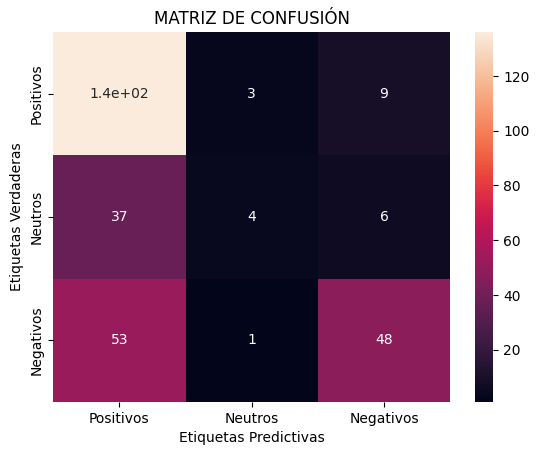

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# Etiquetas, Título and medidas
ax.set_xlabel('Etiquetas Predictivas');ax.set_ylabel('Etiquetas Verdaderas');
ax.set_title('MATRIZ DE CONFUSIÓN');
ax.xaxis.set_ticklabels(['Positivos', 'Neutros','Negativos']); ax.yaxis.set_ticklabels(['Positivos', 'Neutros','Negativos']);

# WordCount

In [296]:
names = ['Id', 'tweet', 'polaridad']
palabras = pd.read_csv('train.txt', sep='\t',names=names)

In [297]:
palabras['tweet2'] = palabras.tweet.str.strip().str.split('[\W_]+')

In [298]:
rows = list()
for row in palabras[['tweet2']].iterrows():
    r = row[1]
    for word in r.tweet2:
        rows.append((word))

tweet2 = pd.DataFrame(rows, columns=['tweet2'])
tweet2.head()

,tweet2
0,No
1,mames
2,este
3,pinche
4,dolor


In [299]:
tweet2 = tweet2[tweet2.tweet2.str.len() > 0]
tweet2['tweet2'] = tweet2.tweet2.str.lower()
tweet2.head()

<ipython-input-299-adfb8bc3f042>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet2['tweet2'] = tweet2.tweet2.str.lower()


,tweet2
0,no
1,mames
2,este
3,pinche
4,dolor


In [300]:
counts = tweet2\
    .tweet2.value_counts()\
    .to_frame()\
    .rename(columns={'tweet2':'n_w'})
counts.head(15)

,count
tweet2,
que,607
de,581
y,474
no,430
a,371
la,353
me,338
en,257
el,244


In [301]:
stopwords = stopwords.words('spanish')

In [302]:
for a_stopword in stopwords:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)

In [303]:
counts.head(20)

,count
tweet2,
si,127
año,63
mejor,50
quiero,50
bien,49
tan,47
días,42
así,40
vida,40


In [304]:
top_500 = counts.head(500)

In [305]:
top_20 = counts.head(20)
top_20

,count
tweet2,
si,127
año,63
mejor,50
quiero,50
bien,49
tan,47
días,42
así,40
vida,40


In [306]:
top_20['palabras'] = counts.head(20)
top_20

<ipython-input-306-f0f217a55af4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['palabras'] = counts.head(20)


,count,palabras
tweet2,,
si,127,127
año,63,63
mejor,50,50
quiero,50,50
bien,49,49
tan,47,47
días,42,42
así,40,40
vida,40,40


<ipython-input-307-12b536ebb0c9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="n_w", y="word", data=top_20_reset, palette=sns.light_palette("yellow", n_colors=20, reverse=True))


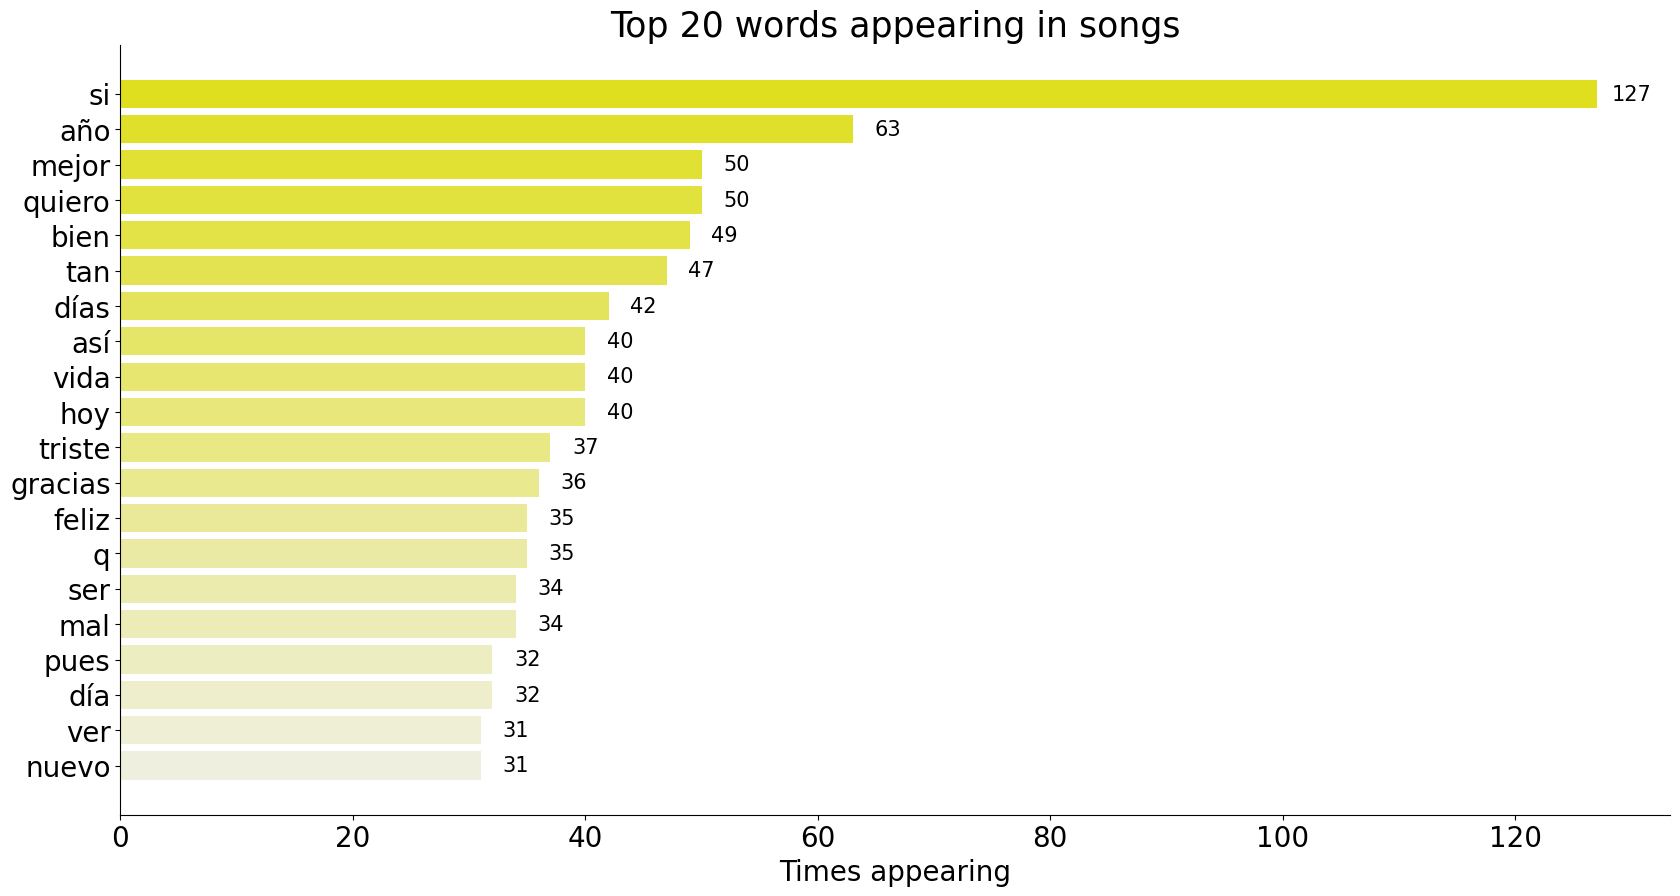

In [307]:
# No es necesario crear la columna 'palabras' de esta manera
# top_20['palabras'] = counts.head(20)
# top_20

# Asegurarse de que top_20 es la DataFrame correcta con la columna 'n_w'
top_20 = counts.head(20)

# Reset the index to make the words a column
top_20_reset = top_20.reset_index()
top_20_reset.columns = ['word', 'n_w'] # Rename columns for clarity

fig, ax = plt.subplots(figsize=(20,10))
# Use the new DataFrame with reset index and specify the column names
ax = sns.barplot(x="n_w", y="word", data=top_20_reset, palette=sns.light_palette("yellow", n_colors=20, reverse=True))
plt.ylabel("")
plt.xlabel('Times appearing', fontsize=20)
plt.title('Top 20 words appearing in songs', fontsize=25)

# Corrected: Set font size for x-axis tick labels
for tick in ax.get_xticklabels():
    tick.set_fontsize(20)

# Corrected: Set font size for y-axis tick labels
for tick in ax.get_yticklabels():
    tick.set_fontsize(20)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3  ,
            p.get_y() + p.get_height()/1.4,
            "%d" % width,
            ha="center", fontsize=15)
sns.despine()
plt.savefig('palabras_populares.jpg')
plt.plot();

In [308]:
top_five_words = counts.head(5).index
top_five_words

Index(['si', 'año', 'mejor', 'quiero', 'bien'], dtype='object', name='tweet2')

In [309]:
!pip install wordcloud
#conda install -c conda-forge wordcloud

In [310]:
import re
from PIL import Image
from wordcloud import WordCloud
from collections import Counter

In [311]:
comment_words = ' '
for val in counts.index:
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    for words in tokens:
        comment_words = comment_words + words + ' '


In [312]:
 trump_mask = np.array(Image.open("african_tree.jpg"))

Recurso de la imagen es de: Kreiger, J. (2024, March 18). African tree silhouette, branch and leaves illustration [Vector illustration]. Jordi's Art Blog. https://learningmidinetr4.z21.web.core.windows.net/free-tree-silhouette-images.html

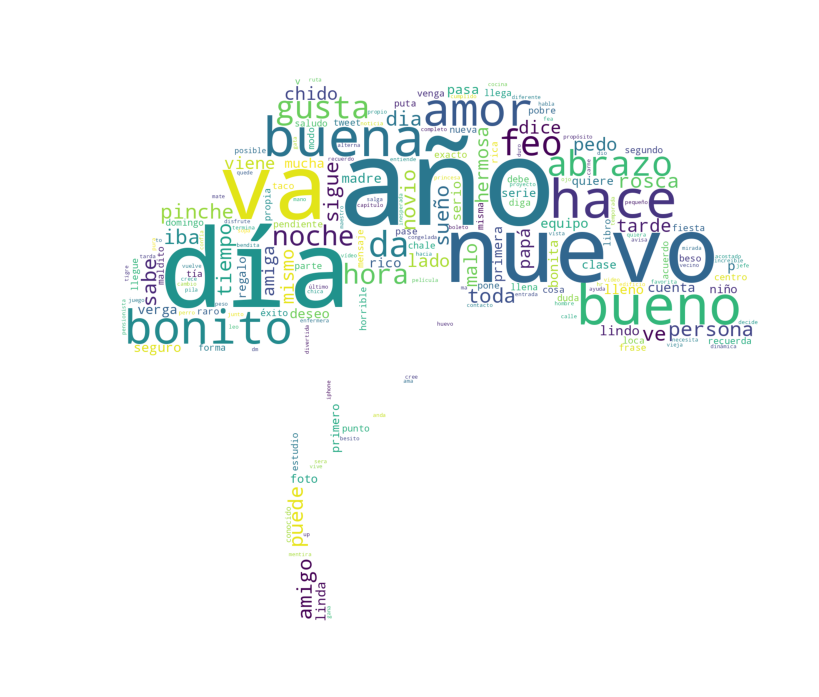

In [313]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                mask=trump_mask,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [314]:
def preprocess(text):
    text = text.lower()
    text = text.replace('á','a')
    text = text.replace('é','e')
    text = text.replace('í','i')
    text = text.replace('ó','o')
    text = text.replace('ú','u')
    text = text.replace('\n','')
    return text